In [2]:
import matplotlib.pyplot as plt
import pandas as pd

For the preliminary dat6a analysis, we won't be making use of the actual image files. All we have to import here are the 5-fold txt files and then combine them into one full fold.

In [3]:
dataset_location = r"D:/The Great Big World of Machine Learning/Projects/datasets/AdienceBenchmarkGenderAndAgeClassification/"

In [4]:
fold_1 = pd.read_table(dataset_location+"fold_1_data.txt", delimiter="\t")
fold_2 = pd.read_table(dataset_location+"fold_2_data.txt", delimiter="\t")
fold_3 = pd.read_table(dataset_location+"fold_3_data.txt", delimiter="\t")
fold_4 = pd.read_table(dataset_location+"fold_4_data.txt", delimiter="\t")
fold_0 = pd.read_table(dataset_location+"fold_0_data.txt", delimiter="\t")

In [5]:
print(fold_0.head(3))
print(fold_2.head(3))
print(fold_4.head(3))

        user_id                original_image  face_id       age gender     x  \
0  30601258@N03  10399646885_67c7d20df9_o.jpg        1  (25, 32)      f     0   
1  30601258@N03  10424815813_e94629b1ec_o.jpg        2  (25, 32)      m   301   
2  30601258@N03  10437979845_5985be4b26_o.jpg        1  (25, 32)      f  2395   

     y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0  414  1086  1383      -115                  30              17  
1  105   640   641         0                   0              94  
2  876   771   771       175                 -30              74  
        user_id                original_image  face_id     age gender    x  \
0  64504106@N06  11831304783_488d6c3a6d_o.jpg      911  (0, 2)      m  438   
1  64504106@N06  11849646776_35253e988f_o.jpg      911  (0, 2)      m   19   
2  64504106@N06  11848166326_57b03f535e_o.jpg      911  (0, 2)      m  382   

     y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0  914   605   606       -9

## Concatenating the 5 folds

We need the folds as one since we are not training any models here.

In [6]:
#Joining The 5 folds
faces_dataset = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4])

In [7]:
faces_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19370 entries, 0 to 3815
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.9+ MB


# Drop Irrelevant Features

According to the details of the dataset, the x, y. dx, dy, tilt_ang, fiducial_yaw_angle and fiducial_score features relate to the position fo the face in the original image the dataset was gotten from. We won't require it in this project so we can drop it.

In [8]:
faces_dataset = faces_dataset.drop(['x', 'y', 'dx', 'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'], axis=1)
print(faces_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19370 entries, 0 to 3815
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         19370 non-null  object
 1   original_image  19370 non-null  object
 2   face_id         19370 non-null  int64 
 3   age             19370 non-null  object
 4   gender          18591 non-null  object
dtypes: int64(1), object(4)
memory usage: 908.0+ KB
None


## Handle Missing Data

Let's see if we have any missing values. Since we will be checking for missing values more than once, we should create a function for that specific purpose, no need to reinvent the wheel.

In [9]:
def missing_info(dataset):
    na_values = pd.isna(dataset)
    na_features = na_values.any()
    print(na_features)
    print()

    #Finding Number of missing values
    total = len(na_values)
    missing = sum(na_values.gender)
    percent = (missing/total) * 100
    print(f"Total values: {total}")
    print(f"Missing Values in Gender: {missing}")
    print(f"Percentage missing: {round(percent, 2)}%")

In [10]:
#check faces_dataset for missing values
missing_info(faces_dataset)

user_id           False
original_image    False
face_id           False
age               False
gender             True
dtype: bool

Total values: 19370
Missing Values in Gender: 779
Percentage missing: 4.02%


Gender was the only column that had missing values and after further analysis, only 4% of it was missing, this means we can get away with dropping the values. However, We are dealing with two labels here (gender and age). Since age is complete, we have to split the dataset into 2 before dropping.

In [85]:
age_dataset = faces_dataset.drop("gender", axis=1)

In [12]:
gender_dataset = faces_dataset.drop("age", axis=1).dropna()
missing_info(gender_dataset)

user_id           False
original_image    False
face_id           False
gender            False
dtype: bool

Total values: 18591
Missing Values in Gender: 0
Percentage missing: 0.0%


The missing values have now been handled and two new datasets have been created. However, it might seem that Gender has no missing values but let's further inspect by checking the unique values of gender.

In [13]:
gender_dataset['gender'].unique()

array(['f', 'm', 'u'], dtype=object)

"u" is a value that marks unidentified genders. This also means missing values, we have to deal with that but let's see how much missing data we're dealing with.

In [14]:
na_values = gender_dataset["gender"]=='u'
#Finding Number of missing values
total = len(na_values)
missing = sum(na_values)
percent = (missing/total) * 100
print(f"Total values: {total}")
print(f"Missing Values in Gender: {missing}")
print(f"Percentage missing: {round(percent, 2)}%")

Total values: 18591
Missing Values in Gender: 1099
Percentage missing: 5.91%


It's only about 6% of 18,591, so we can drop it.

In [15]:
gender_dataset = gender_dataset[gender_dataset.gender != 'u']
gender_dataset['gender'].unique()

array(['f', 'm'], dtype=object)

## Handling Inconsistent Features

Let us examine the 'age' column a little more.

In [16]:
print(age_dataset['age'].unique())

['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']


It can be observed that there are lots of inconsistent values in the age column, including missing values. The missing values were denoted using 'none' which is not the usual convention for missing values in pandas dataframes. We will merge some of these inconsistencies and also see if we should drop the missing values.

In [17]:
na_values = age_dataset["age"]=='None'
#Finding Number of missing values
total = len(na_values)
missing = sum(na_values)
percent = (missing/total) * 100
print(f"Total values: {total}")
print(f"Missing Values in Age: {missing}")
print(f"Percentage missing: {round(percent, 2)}%")

Total values: 19370
Missing Values in Age: 748
Percentage missing: 3.86%


In [86]:
#dropping None values
age_dataset = age_dataset[age_dataset.age != 'None']
print(age_dataset['age'].unique())

['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' '(38, 48)' '35' '3' '55' '58' '22' '13' '45' '36' '23'
 '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42' '46' '32']


**Merging Operations**
To determine which categories we would merge, knowing the amount of data in each category will help.

In [19]:
age_dataset.groupby('age').count()

,user_id,original_image,face_id
age,,,
"(0, 2)",2488,2488,2488
"(15, 20)",1642,1642,1642
"(25, 32)",5004,5004,5004
"(27, 32)",77,77,77
"(38, 42)",46,46,46
"(38, 43)",2293,2293,2293
"(38, 48)",6,6,6
"(4, 6)",2140,2140,2140
"(48, 53)",830,830,830


**List of Merging Operations**
- (0 - 3) = [(0, 2), 2, 3]
- (4 - 6) = [(4, 6)]
- (8 - 13) = [(8, 12), (8, 23), 13]
- (15 - 23) = [(15, 20), 22, 23]
- (25 - 36) = [(25, 32), (27, 32), 29, 32, 34, 35, 36]
- (38 - 48) = [(38, 42), (38, 43), (38, 48), 42, 45, 46]
- (48 - 58) = [(48, 53), 55, 56, 57, 58]
- (60 - 100) = (60, 100)

The ages will be manually merged by visual analysis of the insistent age data. The data on the right will be filtered out to replace them with the new value on the left. We will put this data into a dictionary and then iterate through it to clean up our dataset

In [79]:
merge_values = {
                    "(0 - 3)":["(0, 2)", '2', '3'],
                    "(4 - 6)":['(4, 6)'],
                    "(8 - 13)":['(8, 12)', '(8, 23)', '13'],
                    "(15 - 23)":['(15, 20)', '22', '23'],
                    "(25 - 36)":['(25, 32)', '(27, 32)', '29', '32', '34', '35', '36'],
                    "(38 - 48)":['(38, 42)', '(38, 43)', '(38, 48)', '42', '45', '46'],
                    "(48 - 58)":['(48, 53)', '55', '56', '57', '58']
}

In [88]:
for key in merge_values:
    age_col = age_dataset['age']
    age_col.iloc[age_col.isin(merge_values[key])] = key

           user_id  original_image  face_id
age                                        
(0 - 3)       2509            2509     2509
(15 - 23)     1887            1887     1887
(25 - 36)     5549            5549     5549
(38 - 48)     2435            2435     2435
(4 - 6)       2140            2140     2140
(48 - 58)      937             937      937
(60, 100)      872             872      872
(8 - 13)      2293            2293     2293


D:\Applications\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [90]:
print(age_dataset['age'].unique()) #show the new age labels

['(25 - 36)' '(38 - 48)' '(4 - 6)' '(60, 100)' '(15 - 23)' '(48 - 58)'
 '(8 - 13)' '(0 - 3)']


## Data Visualization

Our main focus are the labels; age and gender. While the image files are the main features we're working with. That limits the analysis we can do on this dataset but nonetheless we can visualize the number of what we are working with on a bar plot.

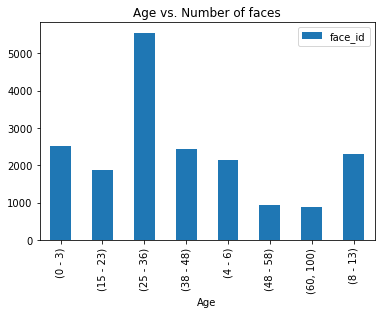

In [91]:
plot_df = age_dataset[['face_id', 'age']].groupby('age').count()
plot_df.plot.bar()
plt.title('Age vs. Number of faces')
plt.xlabel("Age")
plt.show()

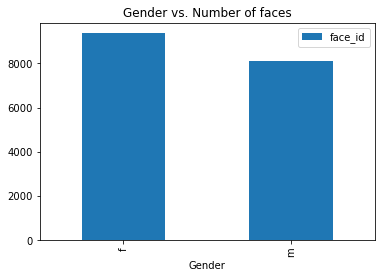

In [92]:
plot_df = gender_dataset[['face_id', 'gender']].groupby('gender').count()
plot_df.plot.bar()
plt.title('Gender vs. Number of faces')
plt.xlabel("Gender")
plt.show()

From the bar plot, it is apparent that the number of male and female Genders are almost balanced. Meanwhile, in the age dataset, the number of faces between ages 25 and 36 are way more than the rest by over 50%, since we will be using neural network for this task, we don't need to bother handling it. Now we save the two datasets to file.

In [93]:
age_dataset.to_csv('age_data.csv', index=False)
gender_dataset.to_csv('gender_data.csv', index=False)